<a href="https://colab.research.google.com/github/rida-manzoor/Brain-Abnormal-Cell-Detection/blob/main/re1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_name = "./gdrive/MyDrive/data"

In [ ]:
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import metrics 
from keras import losses 
from matplotlib.pyplot import imshow
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

from keras.layers import Dropout
from glob import glob

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("./drive/MyDrive/data", output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 3000 files [01:05, 45.77 files/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Resizing image
IMAGE_SIZE =[224,224]

valid_path='content/output/test'
train_path='content/output/train'

In [ ]:
#Adding preprocessing layer in front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE +[3], include_top = False, weights = "imagenet")

#Don't train existing weights
for layers in resnet.layers:
  layers.trainable=False

# Useful for getting number of classes
folders=glob('output/train/*')

# Our layer
x = Flatten()(resnet.output)
x= Dense(len(folders), activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# Create model object
model=Model(inputs=resnet.input,outputs=prediction)


model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
# Use image Data Generator to inport images from dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/output/val',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
75/75 [==============================] - 501s 7s/step - loss: 0.7049 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
75/75 [==============================] - 489s 7s/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/15
75/75 [==============================] - 489s 7s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/15
75/75 [==============================] - 489s 7s/step - loss: 0.6932 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
75/75 [==============================] - 489s 7s/step - loss: 0.6932 - accuracy: 0.4767 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/15
75/75 [==============================] - 488s 7s/step - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/15
75/75 [==============================] - 487s 7s/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/15
75

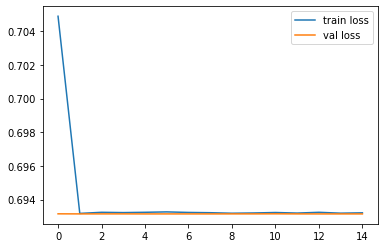

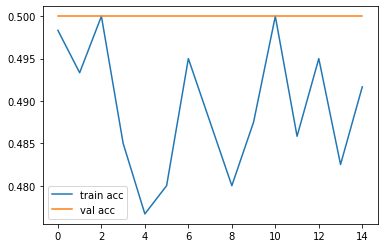

<Figure size 432x288 with 0 Axes>

In [ ]:
# Fit the model
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

#Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

#Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('./drive/MyDrive/model1_resnet.h5')